In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/country-data.csv')

df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


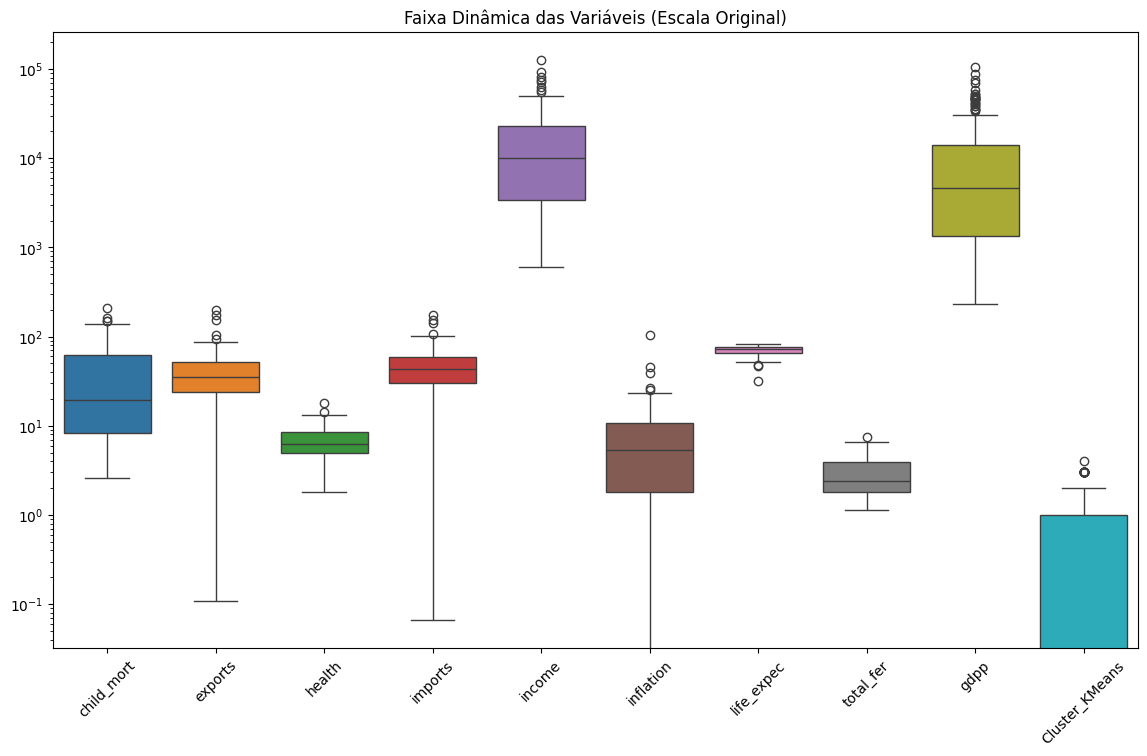

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colunas_numericas = df.drop('country', axis=1)

plt.figure(figsize=(14, 8))
sns.boxplot(data=colunas_numericas)
plt.title("Faixa Dinâmica das Variáveis (Escala Original)")
plt.xticks(rotation=45)
plt.yscale('log') 
plt.show()

Novas estatísticas após pré-processamento:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.89,-1.50,-1.83,-1.94,-0.86,-1.14,-4.34,-1.19,-0.70
25%,-0.75,-0.63,-0.69,-0.69,-0.72,-0.57,-0.59,-0.76,-0.64
50%,-0.47,-0.22,-0.18,-0.15,-0.37,-0.23,0.29,-0.36,-0.45
75%,0.59,0.37,0.65,0.49,0.29,0.28,0.70,0.62,0.06
max,4.22,5.81,4.05,5.27,5.61,9.13,1.38,3.01,5.04


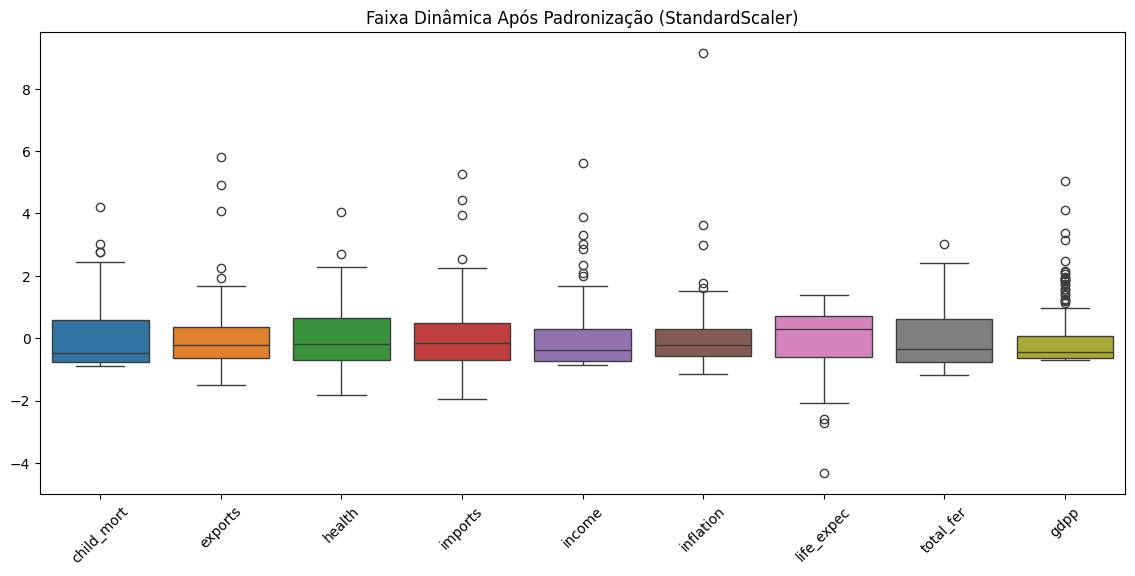

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Etapa de pre processamento
paises = df['country']
dados_brutos = df.drop('country', axis=1)

scaler = StandardScaler()

dados_escalados = scaler.fit_transform(dados_brutos)

df_escalado = pd.DataFrame(dados_escalados, columns=dados_brutos.columns)

print("Novas estatísticas após pré-processamento:")
display(df_escalado.describe().round(2))

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_escalado)
plt.title("Faixa Dinâmica Após Padronização (StandardScaler)")
plt.xticks(rotation=45)
plt.show()

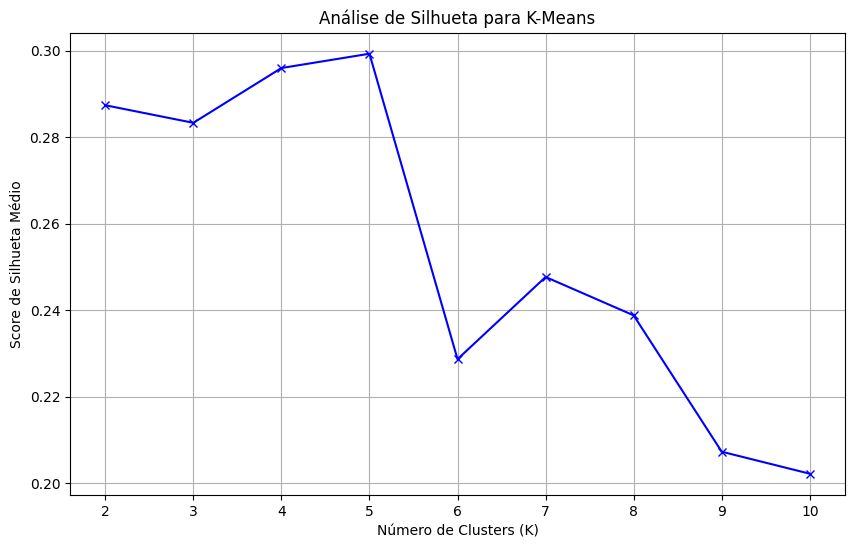

O número ótimo de clusters sugerido pela Silhueta é: 5


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np


range_n_clusters = list(range(2, 11))
silhouette_avg = []

for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_escalado)
    

    silhouette_avg.append(silhouette_score(df_escalado, cluster_labels))

# Gráfico da Silhueta
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Score de Silhueta Médio')
plt.title('Análise de Silhueta para K-Means')
plt.grid(True)
plt.show()

# Identificando o melhor K
melhor_k = range_n_clusters[np.argmax(silhouette_avg)]
print(f"O número ótimo de clusters sugerido pela Silhueta é: {melhor_k}")

# Rodando o K-Means final com o melhor K
kmeans_final = KMeans(n_clusters=melhor_k, random_state=42, n_init=10)
labels_kmeans = kmeans_final.fit_predict(df_escalado)

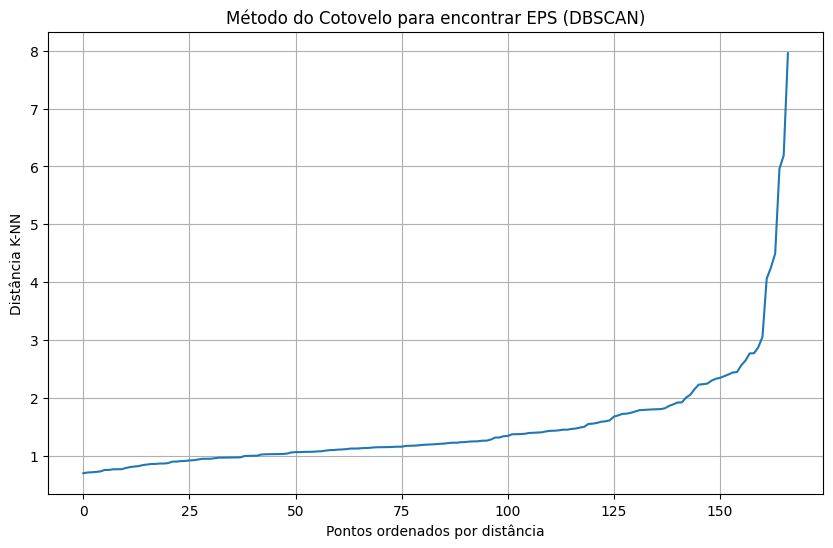

Número de clusters encontrados pelo DBSCAN: 3
Quantidade de ruído (outliers): 53
Silhouette Score DBSCAN: 0.148


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5) 
nbrs = neigh.fit(df_escalado)
distances, indices = nbrs.kneighbors(df_escalado)

distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("Método do Cotovelo para encontrar EPS (DBSCAN)")
plt.ylabel("Distância K-NN")
plt.xlabel("Pontos ordenados por distância")
plt.grid(True)
plt.show()

dbscan = DBSCAN(eps=1.2, min_samples=5) 
labels_dbscan = dbscan.fit_predict(df_escalado)

# Cálculo da Silhueta para DBSCAN 
if len(set(labels_dbscan)) > 1: 
    score_db = silhouette_score(df_escalado, labels_dbscan)
    print(f"Número de clusters encontrados pelo DBSCAN: {len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)}")
    print(f"Quantidade de ruído (outliers): {list(labels_dbscan).count(-1)}")
    print(f"Silhouette Score DBSCAN: {score_db:.3f}")
else:
    print("DBSCAN não convergiu em clusters válidos com esses parâmetros.")

In [ ]:
# Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.
# métricas Calinski-Harabasz e Davies-Bouldin
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

def avaliar_metricas(nome_modelo, dados, labels):
    # Remove outliers
    mask = labels != -1
    labels_validos = labels[mask]
    dados_validos = dados[mask]
    
    if len(set(labels_validos)) < 2:
        print(f"--- {nome_modelo} ---")
        print(f"ERRO: Apenas {len(set(labels_validos))} cluster válido encontrado. Necessário no mínimo 2 para calcular métricas.")
        return

    ch = calinski_harabasz_score(dados_validos, labels_validos)
    db = davies_bouldin_score(dados_validos, labels_validos)
    
    print(f"--- {nome_modelo} ---")
    print(f"Calinski-Harabasz (Maior é melhor): {ch:.2f}")
    print(f"Davies-Bouldin (Menor é melhor): {db:.2f}")

print("\n=== Comparação de Métricas Extras ===")
avaliar_metricas("K-Means", df_escalado, labels_kmeans)
avaliar_metricas("DBSCAN", df_escalado, labels_dbscan)


=== Comparação de Métricas Extras ===
--- K-Means ---
Calinski-Harabasz (Maior é melhor): 57.65
Davies-Bouldin (Menor é melhor): 0.87
--- DBSCAN ---
Calinski-Harabasz (Maior é melhor): 87.30
Davies-Bouldin (Menor é melhor): 0.82


In [ ]:
# Impelmentar gráfico de médias por cluster
df['Cluster_KMeans'] = labels_kmeans

perfil_grupos = df.drop('country', axis=1).groupby('Cluster_KMeans').mean()
display(perfil_grupos)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_KMeans,,,,,,,,,
0,21.614286,40.976060,6.169048,47.518642,12801.071429,7.618857,73.004762,2.277619,6581.809524
1,90.793617,29.661915,6.462553,43.680851,3870.702128,9.951809,59.212766,4.974043,1900.255319
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788437,42118.750000
4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
